# The Duffing Oscillator (Overdamped)

## System:
$$\dot{x} = r - \alpha x - \beta x^3$$

---

## 1. Origin of the $x^3$ Term

The $x^3$ term represents the first nonlinear correction to a linear restoring force (Hooke’s Law).

In many real physical systems, the restoring force is not perfectly linear. A more accurate model of a spring force is:

$$F(x) = -k_1 x - k_3 x^3$$

This nonlinear term arises naturally from a Taylor expansion of any symmetric potential energy function $V(x)$ about equilibrium.

If the potential energy is:

$$V(x) = \frac{1}{2}\alpha x^2 + \frac{1}{4}\beta x^4$$



then the restoring force is given by the negative gradient:

$$F(x) = -\frac{dV}{dx} = -\alpha x - \beta x^3$$

Thus, the cubic term models nonlinear elasticity and appears in:
* Structural mechanics  
* MEMS devices  
* Nonlinear optics  
* Climate tipping models  
* Electrical circuits  

---

## 2. Fixed Points

Fixed points satisfy:

$$\dot{x} = 0$$

Thus,

$$r - \alpha x - \beta x^3 = 0$$

or equivalently,

$$\beta x^3 + \alpha x - r = 0$$

This is a **cubic equation**. Depending on the values of $\alpha$, $\beta$, and the tunable parameter $r$, the system may have:
* One real fixed point, or  
* Three real fixed points.

Changes in the number of real roots correspond to **Saddle-Node Bifurcations**.

Here, $r$ acts as the **bifurcation parameter**.

---

## 3. Stability Analysis

To determine stability, we compute the derivative of the flow:

$$f'(x) = \frac{d}{dx}(r - \alpha x - \beta x^3) = -\alpha - 3\beta x^2$$

A fixed point $x^*$ is:
* **Stable** if $f'(x^*) < 0$
* **Unstable** if $f'(x^*) > 0$

---

## 4. Parameter Combinations

The qualitative behavior depends strongly on the signs of $\alpha$ and $\beta$.

---

### Case A: $\alpha > 0, \beta > 0$

The cubic term dominates for large $|x|$ and bends the graph downward.

Depending on $r$, the system may exhibit:
* One real fixed point (stable), or  
* Three real fixed points (two stable, one unstable).

As $r$ varies, pairs of equilibria are created or destroyed via **Saddle-Node Bifurcations**.

---

### Case B: $\alpha < 0, \beta > 0$ (Bistable Regime)

The system can exhibit **bistability**.

For certain values of $r$, there are:
* Two stable equilibria  
* One unstable equilibrium  

As $r$ increases or decreases, a stable and unstable fixed point collide and annihilate. This produces **hysteresis**, where the system’s final state depends on its history.



[Image of hysteresis loop diagram]


---

### Case C: $\alpha > 0, \beta < 0$

The cubic term destabilizes the system at large $|x|$.

The system may:
* Lose stable equilibria  
* Exhibit runaway growth  

Typically only one equilibrium exists, and it may be unstable.

---

### Case D: $\alpha < 0, \beta < 0$

Both the linear and cubic terms act destabilizing.

Stable equilibria may not exist, and trajectories often diverge.

---

## 5. Bifurcation Structure

Since the fixed points are determined by a cubic equation, varying the parameter $r$ can change the number of real solutions.

When two fixed points collide and disappear, the system undergoes a:

$$\textbf{Saddle-Node Bifurcation}$$



This bifurcation structure is fundamental in nonlinear dynamics and appears in:
* Mechanical oscillators  
* Population models  
* Climate tipping systems  
* Electronic circuits  

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

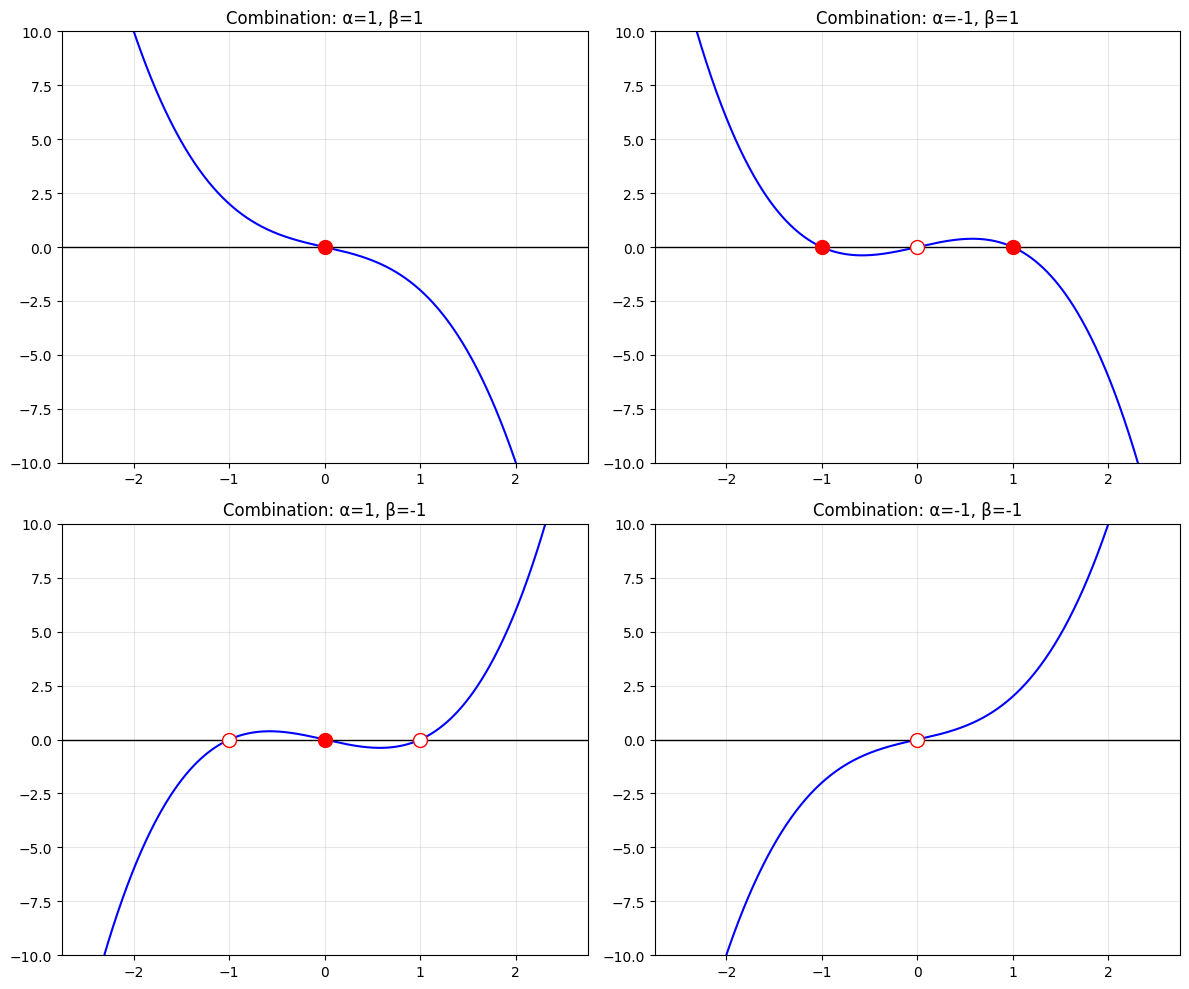

In [2]:
def duffing_flow(x, r, alpha, beta):
    return r - alpha*x - beta*x**3

x = np.linspace(-2.5, 2.5, 500)
combinations = [(1, 1), (-1, 1), (1, -1), (-1, -1)]
r = 0

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (a, b) in enumerate(combinations):
    y = duffing_flow(x, r, a, b)
    ax = axes[i]
    ax.plot(x, y, label=f'α={a}, β={b}', color='blue')
    ax.axhline(0, color='black', lw=1)
    ax.set_title(f"Combination: α={a}, β={b}")
    ax.set_ylim(-10, 10)
    ax.grid(alpha=0.3)
    
    roots = np.roots([b, 0, a, -r])
    real_roots = roots[np.isreal(roots)].real
    for root in real_roots:
        slope = -a - 3*b*root**2
        if slope < 0:
            ax.plot(root, 0, 'ro', ms=10, label='Stable')
        else:
            ax.plot(root, 0, 'ro', ms=10, mfc='w', label='Unstable')

plt.tight_layout()
plt.show()

## Phase Line Analysis for Different Parameter Combinations ($r = 0$)

To understand how the signs of $\alpha$ and $\beta$ affect the qualitative structure of the system, we fix $r = 0$ and visualize:

$$\dot{x} = -\alpha x - \beta x^3.$$



The intersections with $\dot{x} = 0$ correspond to fixed points.

Stable fixed points satisfy:

$$f'(x^*) < 0,$$

while unstable fixed points satisfy:

$$f'(x^*) > 0.$$

This allows us to compare the qualitative structure for all four sign combinations of $\alpha$ and $\beta$.

In [4]:
def simulate_duffing_interactive(r, alpha, beta):
    # Time parameters
    dt = 0.01
    t_max = 15
    t = np.arange(0, t_max, dt)
    
    # We choose ICs to see if they converge or escape
    initial_conditions = [-2, -0.5, 0.5, 2]
    
    plt.figure(figsize=(10, 6))
    
    for x0 in initial_conditions:
        x_values = [x0]
        curr_x = x0
        
        for _ in range(len(t) - 1):
            # Duffing ODE: dxdt = r - alpha*x - beta*x^3
            dxdt = r - alpha*curr_x - beta*(curr_x**3)
            curr_x = curr_x + dxdt * dt
            
            # Catch divergence for beta < 0 cases
            if abs(curr_x) > 20:
                x_values.append(np.sign(curr_x) * 20)
                break
            x_values.append(curr_x)
            
        plt.plot(t[:len(x_values)], x_values, label=f'x(0) = {x0}')

    plt.title(fr'Duffing Trajectories: $\dot{{x}} = {r} - ({alpha})x - ({beta})x^3$')
    plt.xlabel('Time (t)')
    plt.ylabel('x(t)')
    plt.ylim(-5, 5)
    plt.axhline(0, color='black', lw=1, alpha=0.3)
    plt.legend(loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.show()

# Sliders for tuning the system
interact(simulate_duffing_interactive, 
         r=FloatSlider(value=0, min=-2, max=2, step=0.1),
         alpha=FloatSlider(value=-1, min=-2, max=2, step=0.1),
         beta=FloatSlider(value=1, min=-1, max=1.5, step=0.1));

interactive(children=(FloatSlider(value=0.0, description='r', max=2.0, min=-2.0), FloatSlider(value=-1.0, desc…